In [5]:
import numpy as np
import mempute as mp
#from queue import deque

from tools import create_sin, make_timeseries, split_train_test#, visualize_random_data
from tools import batch_loader, shuffle

#from pprint import pprint as pp
#import pylab as plt

X_SIZE = 64
Y_SIZE = 64

data = create_sin()
data_x, data_y = make_timeseries(data, x_size=X_SIZE, y_size=Y_SIZE)
train_x, test_x = split_train_test(data_x)
train_y, test_y = split_train_test(data_y)

print('train_x:', train_x.shape)
print('train_y:', train_y.shape)
print('test_x :', test_x.shape)
print('test_y :', test_y.shape)

#visualize_random_data(train_x, train_y)

trc = mp.tracer(0, 'sign')
#mp.npset(trc, 10000)
#mp.modeset(trc, 1)

X_TIME_SIZE = X_SIZE#64
Y_TIME_SIZE = Y_SIZE#64
FEATURE_SIZE = 1
HIDDEN_SIZE = 32

np.random.seed(0)
#mp.lapset(trc, 3)
#mp.gprset(trc, 0.01)

rnn_input = mp.flux(trc, [-1, X_TIME_SIZE, FEATURE_SIZE], mp.variable, mp.tfloat)
rnn_output = mp.flux(trc, [-1, X_TIME_SIZE, FEATURE_SIZE], mp.variable, mp.tfloat)

mp.traceopt(trc, 0, 4)
mp.traceopt(trc, 9, 4)
mp.traceopt(trc, 8, 1)
mp.traceopt(trc, 10, 1)
cnet = mp.coaxial(rnn_input, rnn_output, 32, 0, 0, 0);

from datetime import datetime
i = 0
for epoch in range(1):
    train_x, train_y = shuffle(train_x, train_y)
    for sample_x, sample_y in batch_loader(train_x, train_y, batch_size=10):
        mp.feeda(rnn_input, sample_x)
        mp.feeda(rnn_output, sample_y)
        #startTime = datetime.now()
        total_loss = mp.train(cnet);
        #print("Time taken:", datetime.now() - startTime)
        #_total_loss = mp.eval(total_loss)
        #_total_loss = _total_loss[0]
        mp.printo(total_loss);
        #print(f'[Epoch:{epoch+1}] loss: {_total_loss:<7.4}', end='\r')
        #s = input()
        i += 1
        if i> 300:
            break;
    print()
#mp.save_weight(trc)

train_x: (5232, 64, 1)
train_y: (5232, 64, 1)
test_x : (1308, 64, 1)
test_y : (1308, 64, 1)



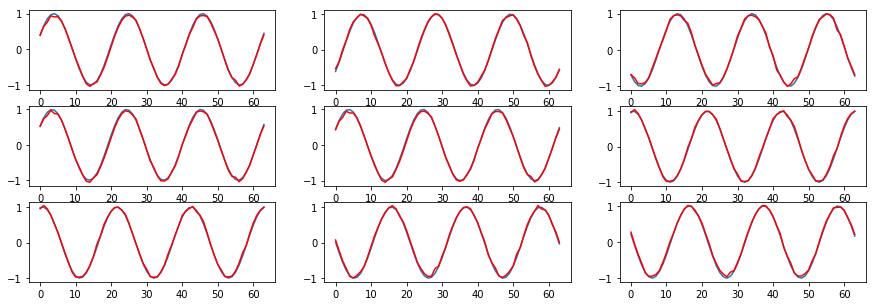

In [6]:
import pylab as plt
N = test_x.shape[0]
idices = np.random.choice(np.arange(N), size=9, replace=False)

result_pred = []
result_true = []

for idx in idices:
    sample_x = test_x[idx:idx+1]
    sample_y = test_y[idx:idx+1]
    
    mp.feeda(rnn_input, sample_x)
    mp.feeda(rnn_output, sample_y)

    y_preds, loss = mp.predict(cnet, 1)
    
    mp.printo(loss);
    mp.printo(y_preds)
    
    _y_preds = mp.eval(y_preds)
    _y_preds = _y_preds.reshape(-1, 1)
    result_pred.append(_y_preds)
    result_true.append(sample_y.reshape(-1, 1))

fig, plots = plt.subplots(3, 3)
fig.set_figheight(5)
fig.set_figwidth(15)

plots = plots.reshape(-1)
for i, p in enumerate(plots):
    p.plot(result_true[i])
    p.plot(result_pred[i], color='red')